# Extract Text from Image
This notebook extracts text from the entire image without dividing it into regions.

* First try NO image processing to see how welltesseract can extract text from the BAS graphic.

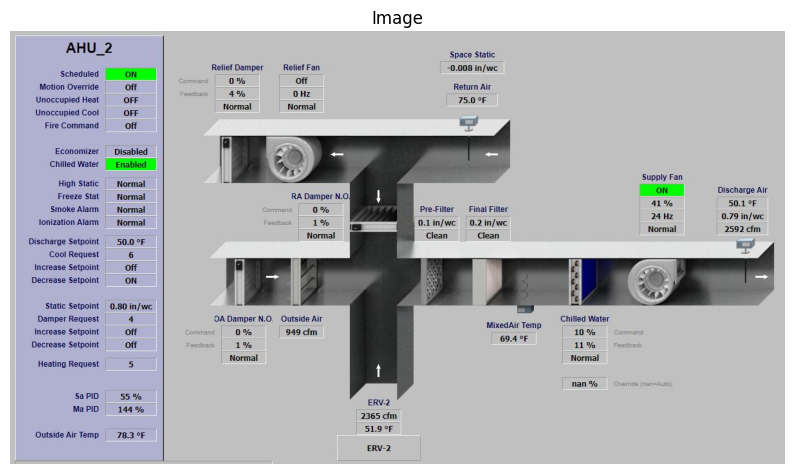

In [8]:
import pytesseract
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Specify the path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\bbartling\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# Function to extract text from an image
def image_to_text(image_path):
    image = cv2.imread(image_path)
    text = pytesseract.image_to_string(image)
    return text

# Function to display the image
def display_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image')
    plt.axis('off')
    plt.show()

# Specify the path to your image
ahu = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\data\ahu\ahu.jpg'

# Display the image
image = cv2.imread(ahu)
display_image(image)

# Extract text from the image
extracted_text_ahu = image_to_text(ahu)

# Display the extracted text in a scrollable text area
html_output = f"""
<div style="height: 300px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;">
    <pre>{extracted_text_ahu}</pre>
</div>
"""
display(HTML(html_output))


Preprocessing Steps:

* Grayscale Conversion: Converts the image to grayscale.
* Median Blurring: Reduces noise.
* Adaptive Thresholding: Enhances text detection by making the text stand out.

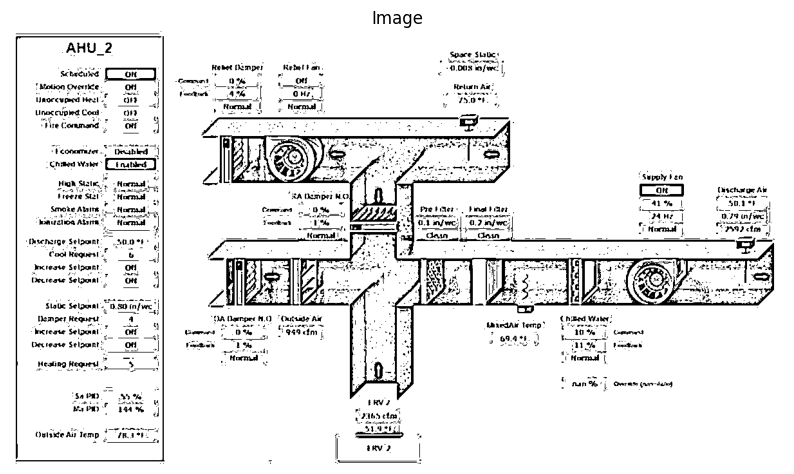

In [7]:
import pytesseract
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Specify the path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\bbartling\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 3)
    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    return thresh

# Function to extract text from an image
def image_to_text(image_path):
    preprocessed_image = preprocess_image(image_path)
    text = pytesseract.image_to_string(preprocessed_image)
    return text

# Function to display the image
def display_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image')
    plt.axis('off')
    plt.show()

# Specify the path to your image
ahu = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\data\ahu\ahu.jpg'

# Preprocess and display the image
preprocessed_image = preprocess_image(ahu)
display_image(preprocessed_image)

# Extract text from the image
extracted_text_ahu = image_to_text(ahu)

# Display the extracted text in a scrollable text area
html_output = f"""
<div style="height: 300px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;">
    <pre>{extracted_text_ahu}</pre>
</div>
"""
display(HTML(html_output))


* Resizing: Upscaling the image can help in better text recognition, especially for small text.
* Edge Detection: Highlighting text boundaries using edge detection.

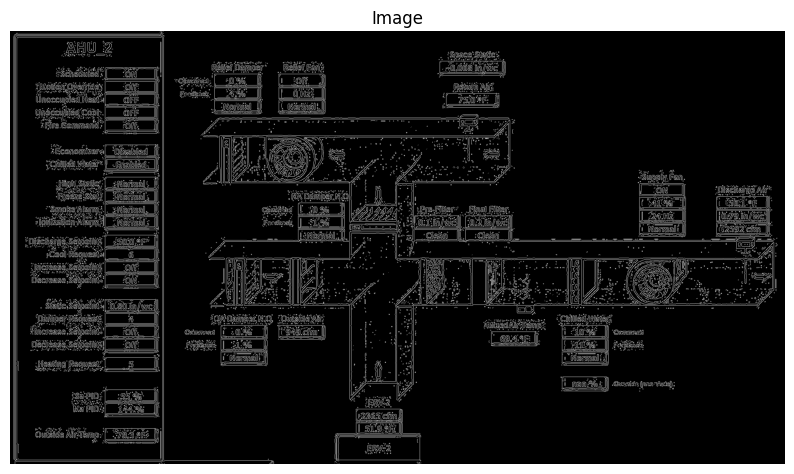

In [9]:
import pytesseract
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Specify the path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\bbartling\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # Upscaling the image
    scale_percent = 200  # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
    
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 3)
    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    # Apply edge detection
    edges = cv2.Canny(thresh, 50, 150)
    return edges

# Function to extract text from an image
def image_to_text(image_path):
    preprocessed_image = preprocess_image(image_path)
    text = pytesseract.image_to_string(preprocessed_image)
    return text

# Function to display the image
def display_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image')
    plt.axis('off')
    plt.show()

# Specify the path to your image
ahu = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\data\ahu\ahu.jpg'

# Preprocess and display the image
preprocessed_image = preprocess_image(ahu)
display_image(preprocessed_image)

# Extract text from the image
extracted_text_ahu = image_to_text(ahu)

# Display the extracted text in a scrollable text area
html_output = f"""
<div style="height: 300px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;">
    <pre>{extracted_text_ahu}</pre>
</div>
"""
display(HTML(html_output))


Mild Preprocessing Approach
* Grayscale Conversion: Convert the image to grayscale to reduce complexity.
* Mild Resizing: Upscale the image slightly to help with small text.
* Simple Thresholding: Apply binary thresholding to make the text stand out without excessive blurring.

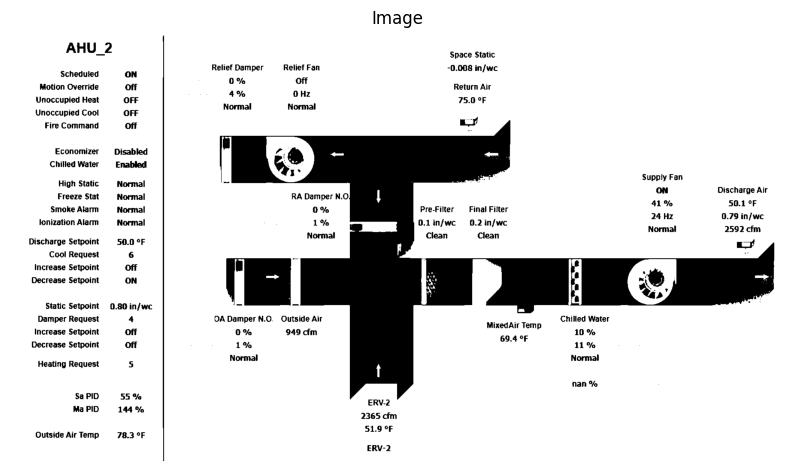

In [10]:
import pytesseract
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Specify the path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\bbartling\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # Mild upscaling of the image
    scale_percent = 150  # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
    
    # Convert to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return thresh

# Function to extract text from an image
def image_to_text(image_path):
    preprocessed_image = preprocess_image(image_path)
    text = pytesseract.image_to_string(preprocessed_image)
    return text

# Function to display the image
def display_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image')
    plt.axis('off')
    plt.show()

# Specify the path to your image
ahu = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\data\ahu\ahu.jpg'

# Preprocess and display the image
preprocessed_image = preprocess_image(ahu)
display_image(preprocessed_image)

# Extract text from the image
extracted_text_ahu = image_to_text(ahu)

# Display the extracted text in a scrollable text area
html_output = f"""
<div style="height: 300px; overflow-y: scroll; border: 1px solid #ccc; padding: 10px;">
    <pre>{extracted_text_ahu}</pre>
</div>
"""
display(HTML(html_output))


### Drop in a `config.json` for Hugging Face API Key

Please create a `config.json` file in this directory with the following content:

```json
{
  "API_KEY": "paste_api_key_here"
}
```

In [3]:
import os
import requests
import json

# Load configuration from file
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

# Retrieve the API key from the configuration
API_KEY = config.get("API_KEY")

# Ensure the API key is available
if not API_KEY:
    raise ValueError("API key not found in environment variables")

# Set up the API URL and headers
API_URL = "https://api-inference.huggingface.co/models/mistralai/Mistral-7B-v0.1"
headers = {"Authorization": f"Bearer {API_KEY}"}

# Example telemetry data (instantaneous readings)
duct_static_pressure = 0.3
duct_static_setpoint = 0.4
fan_vfd_speed = 96

# Function to generate a response using the API
def generate_response(prompt):
    # Prepare the payload
    data = {
        "inputs": prompt,
        "parameters": {
            "max_length": 200,  # Adjust max_length for concise responses
            "temperature": 0.5,  # Adjust the creativity of the response
            "top_p": 0.95,  # Use nucleus sampling
            "num_return_sequences": 1  # Return only one response
        }
    }

    # Make the request to the Hugging Face Inference API
    response = requests.post(API_URL, headers=headers, json=data)

    # Debugging: print status code and response content
    print(f"Status Code: {response.status_code}")
    print(f"Response Content: {response.text}")

    try:
        response_json = response.json()
    except ValueError:
        print("Failed to decode JSON response")
        return ""

    # Print the response from the model
    if isinstance(response_json, list):
        return response_json[0].get("generated_text", "").strip()
    else:
        print("Error:", response_json)
        return ""

# Define the fault detection logic and data in the prompt
prompt = (
    "You are an advanced virtual AI HVAC assistant specialized in fault detection telemetry.\n"
    "Here is the telemetry data from a VAV AHU system:\n"
    f"- Duct Static Pressure: {duct_static_pressure} inches\n"
    f"- Duct Static Setpoint: {duct_static_setpoint} inches\n"
    f"- Fan VFD Speed: {fan_vfd_speed}%\n\n"
    "Using the ASHRAE G36 fault detection logic:\n"
    "If the duct static pressure is less than the setpoint minus 0.1 inches AND the fan VFD speed is greater than or equal to 90%, flag a fault.\n"
    "Return only the fault condition flag (0 for no fault, 1 for fault) and explain the result in simple terms mechanical engineering theory for a building operator on how a variable volume supply fan achieves a duct static pressure."
)

# Generate and print the response
assistant_reply = generate_response(prompt)
print("Assistant:", assistant_reply)


Status Code: 200
Response Content: [{"generated_text":"You are an advanced virtual AI HVAC assistant specialized in fault detection telemetry.\nHere is the telemetry data from a VAV AHU system:\n- Duct Static Pressure: 0.3 inches\n- Duct Static Setpoint: 0.4 inches\n- Fan VFD Speed: 96%\n\nUsing the ASHRAE G36 fault detection logic:\nIf the duct static pressure is less than the setpoint minus 0.1 inches AND the fan VFD speed is greater than or equal to 90%, flag a fault.\nReturn only the fault condition flag (0 for no fault, 1 for fault) and explain the result in simple terms mechanical engineering theory for a building operator on how a variable volume supply fan achieves a duct static pressure.\n\nYour answer:\n\nThe fault condition is 0. The duct static pressure is less than the setpoint minus 0.1 inches, but the fan VFD speed is less than 90%.\n\nA variable volume supply fan achieves a duct static pressure by adjusting the speed of the fan. When the fan speed is increased, the airf